In [98]:
%matplotlib inline

# K Nearest Neighbours - KNN

KNN is a very simple classification algorithm in which you are comparing a new unclassified item,x, to all the known classified items, y.

The name very simply describes how the algorithm works. It classifies by comparing the "distance" of the unclassified item to the known items. k is a hyperparameter, it refers the the number of neighbours x will be compared to.

The algorithm has 3 steps

1. Calculate distance from x to every other item
2. Determine x's nearest k amount of neighbours
3. Average out the distances of the categories of the neighbours, x is assigned the closest category.

### Example

Lets take a look at a very simple example.

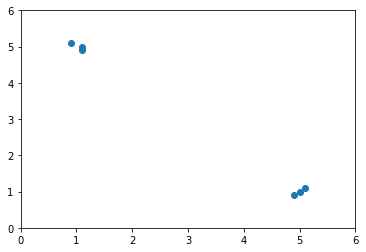

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim([0,6])
ax.set_ylim([0,6])
x = [0.9, 1.1, 1.1, 4.9, 5.0, 5.1]
y = [5.1, 5.0, 4.9, 0.9, 1.0, 1.1]
ax.scatter(x, y)

If I was asked to create two categories for this dataset there is two obvious choices

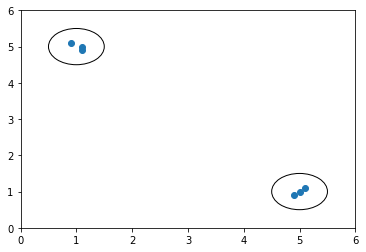

In [100]:
circle_1 = plt.Circle((1,5), .5, color="black", fill=False)
circle_2 = plt.Circle((5,1), .5, color="black", fill=False)
ax.add_patch(circle_1)
ax.add_patch(circle_2)
fig

Pretty simple, but what about if we want to know the category of a new point?

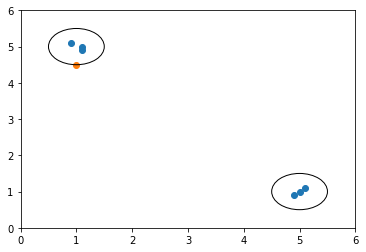

In [101]:
# circle_1.remove()
# circle_2.remove()

ax.scatter([1],[4.5])
fig

Which category does this new belong to? Most likely to the top left cluster.

What about

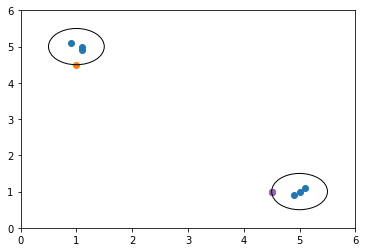

In [108]:
ax.scatter([4.5], [1])
fig

Pretty easy right? So that's the intuition behind KNN, let's move on to how it works.

## Data Prep

In [102]:
# First import the iris dataset, using sklearn but the dataset is widely available
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np


# Converting sklearn dataset into a more generic pandas dataframe
iris = load_iris()
# Load iris data into a DataFrame
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add a targets column
iris_data['target'] = pd.Series(iris.target)

In [103]:
# Lets take a look at the first 5 rows of data
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we have our dataset. Following standard machine learning practices we will split our dataset into 3. 

Training Set - 70% - used to train the model

Validation Set - 15% - used as a validation set to tune hyperparameters

Testing Set - 15% - used to provide an unbiased evaluation

In [104]:
# Take a random sample to train the model
training = iris_data.sample(frac=0.7,random_state=55)
# Temp frame with training data removed
temp = iris_data[~iris_data.isin(training)].dropna()
# Split remaining frame randomly in 2
validation = temp.sample(frac=0.5,random_state=55)
testing = temp[~temp.isin(validation)].dropna()

Let's take a look at how this graphs out

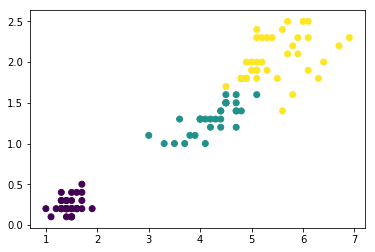

In [105]:
plt.scatter(training['petal length (cm)'], training['petal width (cm)'], c=training['target'])
plt.show()

We have 3 nice little clusters in this two dimension analysis so lets talk distance functions.

## Distance metrics

Distance metrics are the keystone of this learning algorithm. The choice or even creation will heavily depend on the data you are modelling.

A distance metric is a function that measures the "difference" between two points.

Let's take a look at a couple different metrics.

### Euclidean

The Euclidean distance metric is the simpliest and most obvious choice. It's the distance between any two points as the crow flies. The theory behind it is the same as the pythagreous therom, c<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup>.

In 2d space comparing points P(p<sub>1</sub>, p<sub>2</sub>) and Q(q<sub>1</sub>, q<sub>2</sub>), its as simple as $\sqrt{(q_1 - p_1)^2 + (q_2 - p_1)^2}$

In more general terms for the points P(p<sub>1</sub>, p<sub>2</sub>, ... , p<sub>n</sub>) and Q(q<sub>1</sub>, q<sub>2</sub>, ... , q<sub>n</sub>) it can be written as $\sqrt{\sum{(q_i - p_i)^2}}$

![Euclidean Distance](https://miro.medium.com/max/1400/1*IVy5Ozk6e3sQtG_wuKo19A.jpeg)

Euclidean distance is the simpliest and most common distance measure. Whenever magnitude is an important metric euclidean distance is generally a good choice. Something important to remember, in high dimension spaces, normalizings the distances may be required.



In [1]:
def euclidean_distance(p, q):
    """ ([int], [int]) -> int
    A simple dimensional generic distance metric between two points.
    Measures the striaght line distance between  two points.
    
    This code sample is for a visualization of how it works. You can 
    find and should use algorithm in standard numerical computing 
    libraries
        numpy - numpy.linalg.norm(p-q)
        scipy - scipy.spatial.distance.euclidean(p, q)
        sklearn - sklearn.metrics.pairwise.euclidean_distances(p, q)
        etc.
    runtime: O(n)
    
    >>> p, q = [0, 0], [2, 0]
    >>> euclidean_distance(p, q)
    2
    >>> r, s = [1, 1, 1], [4, 5, 13]
    >>> euclidean_distance(r, s)
    13
    """
    result = 0
    for pi, qi in zip(p, q):
        result += (qi - pi)**2
    return np.sqrt(result)

### Cosine distance

Cosine distance, also known as cosine similarity, is the angle measurement between two vectors.

![Cosine distance](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png)

$cos(\pmb x, \pmb y) = \frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||}$

Cosine distance is commonly used when magnitude is an irrelavent metric.

For example, when attempting to match similar documents, a common approach is to compare the maximum number of common words in  the documents. However a flaw with this approach is that as the document length increases so does the words used.


In [2]:
def cosine_distance(p, q):
    """([int], [int]) -> int
    A simple dimensional-generic distance metric between two points
    Measures the angle between two points.
    
    This code sample is for a visualization of how it works. You can 
    find and should use algorithm in standard numerical computing 
    libraries
        scipy - scipy.spatial.distance.cosine(p, q)
        sklearn - sklearn.metrics.pairwise.cosine_similarity(p, q)
    """
    norm_pi, norm_qi, dot_product = 0, 0, 0
    # Computer dot product and norms   
    for i in range(len(v1)):
        p_i = p[i]; q_i = q[i]
        norm_p += p_i*p_i
        norm_q += q_i*q_i
        dot += p_i*q+i
    return dot/math.sqrt(norm_p*normq)

def numpy_cosine_distance(p, q):
    """
    A simple numpy implementation
    """
    dot = np.dot(p, q)
    norm_p = np.linalg.norm(p)
    norm_q = np.linalg.norm(q)
    return dot / (norm_p * norm_q)